# Evaluierung

## Korrelation

### Herzfrequenz

Best correlation between the Signals: 0 Minutes offset


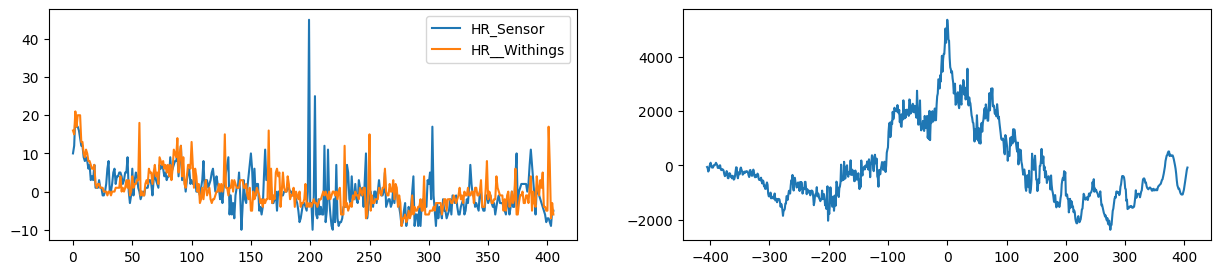

In [285]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as skm

date = "29112021"

df_sensor = pd.read_csv("Sensordata/clean/" + date + "_sensor_data")
df_withings = pd.read_csv("Withings_Data/clean/" + date + "_withings_data")

clean_start = 20
offset = 67
hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()
hr_s_norm = hr_sensor[clean_start:-clean_start] - np.median(hr_sensor[clean_start:-clean_start])
hr_w_norm = hr_withings[offset:len(hr_s_norm)+offset] - np.median(hr_withings[offset:len(hr_s_norm)+offset])
hr_s_clipped = hr_sensor[clean_start:-clean_start]
hr_w_clipped = hr_withings[offset:len(hr_s_clipped)+offset]
cross_corr = signal.correlate(hr_s_norm, hr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.plot(hr_s_norm, label="HR_Sensor")
plt.plot(hr_w_norm, label="HR__Withings")
plt.legend()
plt.subplot(122)
plt.plot(x_vals, cross_corr)
plt.show
print("Best correlation between the Signals:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2), "Minutes offset")

Accuracy: 0.10837438423645321
Precision: 0.1876390164268952
F1-Score: 0.11416260504852903


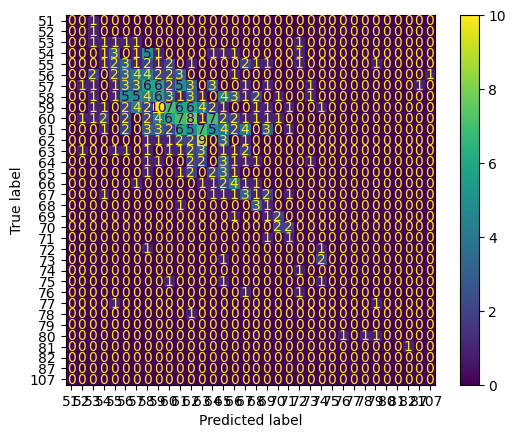

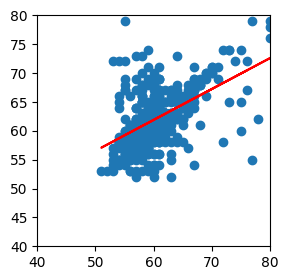

In [305]:
print("Accuracy:", skm.accuracy_score(hr_w_norm, hr_s_norm))
print("Precision:", skm.precision_score(hr_w_norm, hr_s_norm, average='macro', zero_division=1))
print("F1-Score:", skm.f1_score(hr_w_norm, hr_s_norm, average="weighted"))
ConfusionMatrixDisplay.from_predictions(hr_w_clipped, hr_s_clipped)
plt.figure(figsize=(3, 3))
plt.scatter(hr_w_clipped, hr_s_clipped)
plt.xlim([40, 80])
plt.ylim([40, 80])
z = np.polyfit(hr_w_clipped, hr_s_clipped, 1)
p = np.poly1d(z)
plt.plot(hr_w_clipped,p(hr_w_clipped),"r")
plt.show()

### Atemfrequenz

Best correlation between the Signals: 0 Minutes offset


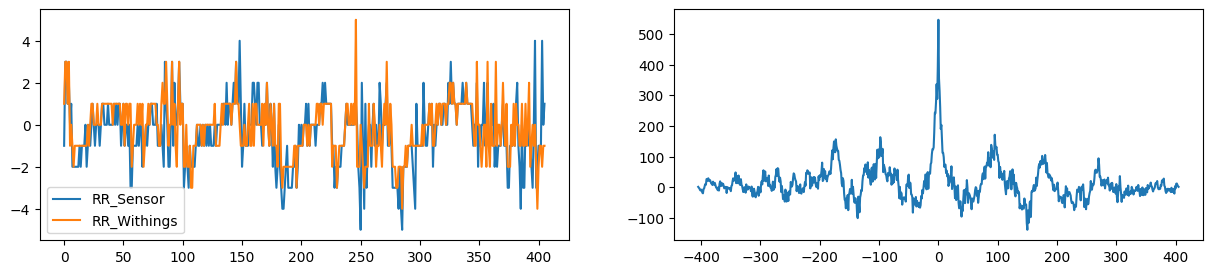

In [287]:
rr_sensor = df_sensor["rr_sensor"].to_list()
rr_withings = df_withings["rr_withings"].to_list()
rr_s_norm = rr_sensor[clean_start:-clean_start] - np.median(rr_sensor[clean_start:-clean_start])
rr_w_norm = rr_withings[offset:len(rr_s_norm)+offset] - np.median(rr_withings[offset:len(rr_s_norm)+offset])
rr_s_clipped = rr_sensor[clean_start:-clean_start]
rr_w_clipped = rr_withings[offset:len(rr_s_clipped)+offset]
cross_corr = signal.correlate(rr_s_norm, rr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.plot(rr_s_norm, label="RR_Sensor")
plt.plot(rr_w_norm, label="RR_Withings")
plt.legend()
plt.subplot(122)
plt.plot(x_vals, cross_corr)
plt.show
print("Best correlation between the Signals:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2), "Minutes offset")

Accuracy: 0.4187192118226601
Precision: 0.3490564984268133
F1-Score: 0.4410397182265673


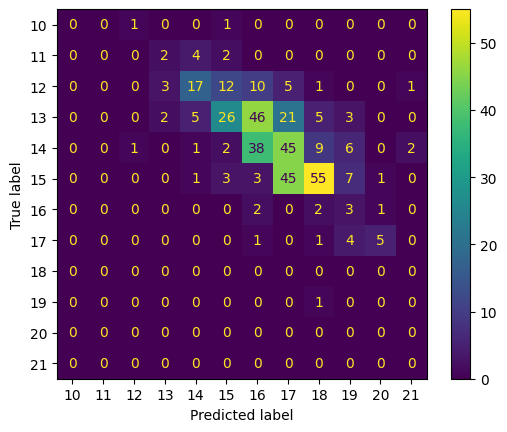

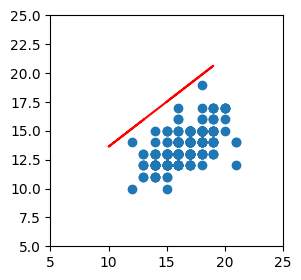

In [304]:
print("Accuracy:", skm.accuracy_score(rr_w_norm, rr_s_norm))
print("Precision:", skm.precision_score(rr_w_norm, rr_s_norm, average='macro', zero_division=1))
print("F1-Score:", skm.f1_score(rr_w_norm, rr_s_norm, average="weighted"))
ConfusionMatrixDisplay.from_predictions(rr_w_clipped, rr_s_clipped)
plt.figure(figsize=(3, 3))
plt.scatter(rr_s_clipped, rr_w_clipped)
plt.ylim([5, 25])
plt.xlim([5, 25])
z = np.polyfit(rr_w_clipped, rr_s_clipped, 1)
p = np.poly1d(z)
plt.plot(rr_w_clipped,p(rr_w_clipped),"r")
plt.show()

### Schlafphasen

Best correlation between the Signals: 0 Minutes offset


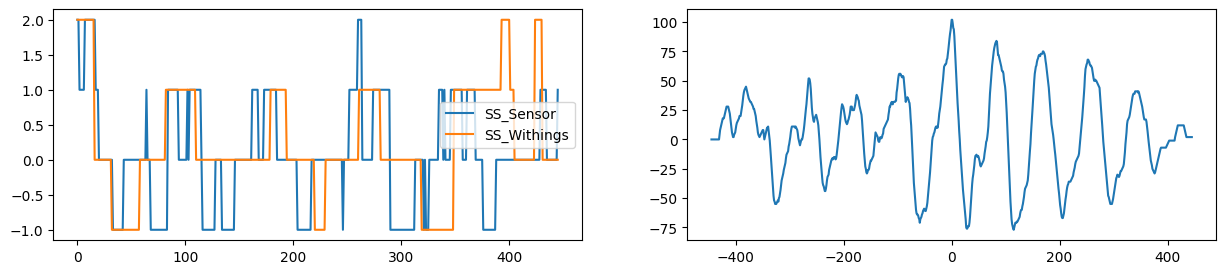

In [289]:
ss_sensor = df_sensor["ss_sensor"].to_list()
ss_withings = df_withings["ss_withings"].to_list()
ss_s_norm = ss_sensor - np.median(ss_sensor)
ss_w_norm = ss_withings[offset:len(ss_s_norm)+offset] - np.median(ss_withings[offset:len(ss_s_norm)+offset])
ss_s_clipped = ss_sensor[clean_start:-clean_start]
ss_w_clipped = ss_withings[offset:len(ss_s_clipped)+offset]
cross_corr = signal.correlate(ss_s_norm, ss_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.plot(ss_s_norm, label="SS_Sensor")
plt.plot(ss_w_norm, label="SS_Withings")
plt.legend()
plt.subplot(122)
plt.plot(x_vals, cross_corr)
plt.show
print("Best correlation between the Signals:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2),"Minutes offset")

Accuracy: 0.3497536945812808
Precision: 0.21664017412353836
F1-Score: 0.34624732702342875


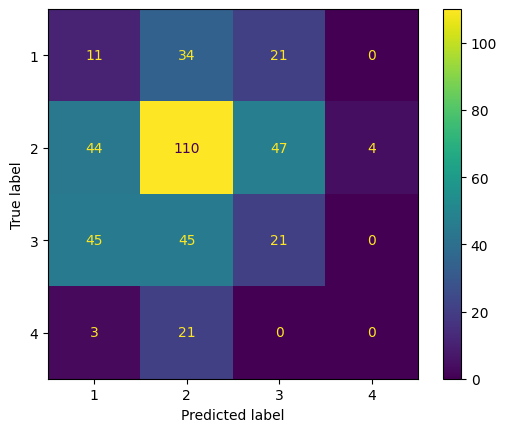

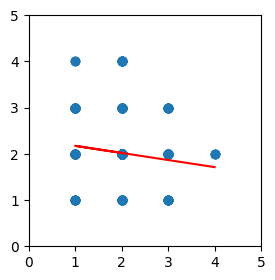

In [306]:
print("Accuracy:", skm.accuracy_score(ss_w_clipped, ss_s_clipped))
print("Precision:", skm.precision_score(ss_w_clipped, ss_s_clipped, average='macro', zero_division=1))
print("F1-Score:", skm.f1_score(ss_w_clipped, ss_s_clipped, average="weighted"))
ConfusionMatrixDisplay.from_predictions(ss_w_clipped, ss_s_clipped)
plt.figure(figsize=(3, 3))
plt.scatter(ss_s_clipped[:len(ss_w_clipped)], ss_w_clipped)
plt.ylim([0, 5])
plt.xlim([0, 5])
z = np.polyfit(ss_w_clipped, ss_s_clipped[:len(ss_w_clipped)], 1)
p = np.poly1d(z)
plt.plot(ss_w_clipped[:len(ss_w_clipped)],p(ss_w_clipped)[:len(ss_w_clipped)],"r")
plt.show()